In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
# importing packages
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

# model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

# read in the csv file
data = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv', index_col="id")

# visualizing the data
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# information to train with
X = data.copy().dropna()
y = X.pop('stroke')

# pre-processing the data
features_num = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
features_cat = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),)

# splitting up the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

In [4]:
# creating the model
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.2),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.2),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.2),
    
    layers.Dense(1, activation='sigmoid'),
])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [5]:
# compiling the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [6]:
# creating an early stopping callback
early_stopping = callbacks.EarlyStopping(
    patience=2,
    min_delta=0.001,
    restore_best_weights=True,
)

# learning rate schedule, decreasing the learning rate over the course of training
lr_schedule = callbacks.ReduceLROnPlateau(
    patience=0,
    factor=0.2,
    min_lr=0.001,
)

In [7]:
# training the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping, lr_schedule]
)

2022-01-17 06:28:04.254585: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
8/8 [==============================] - 2s 56ms/step - loss: 0.8720 - binary_accuracy: 0.5409 - val_loss: 0.6566 - val_binary_accuracy: 0.8396
Epoch 2/200
8/8 [==============================] - 0s 15ms/step - loss: 0.7361 - binary_accuracy: 0.5805 - val_loss: 0.5914 - val_binary_accuracy: 0.9446
Epoch 3/200
8/8 [==============================] - 0s 15ms/step - loss: 0.6618 - binary_accuracy: 0.6243 - val_loss: 0.5602 - val_binary_accuracy: 0.9479
Epoch 4/200
8/8 [==============================] - 0s 15ms/step - loss: 0.6254 - binary_accuracy: 0.6759 - val_loss: 0.5287 - val_binary_accuracy: 0.9520
Epoch 5/200
8/8 [==============================] - 0s 14ms/step - loss: 0.5794 - binary_accuracy: 0.7191 - val_loss: 0.4925 - val_binary_accuracy: 0.9593
Epoch 6/200
8/8 [==============================] - 0s 14ms/step - loss: 0.5284 - binary_accuracy: 0.7656 - val_loss: 0.4603 - val_binary_accuracy: 0.9601
Epoch 7/200
8/8 [==============================] - 0s 14ms/step - loss: 0.49

<AxesSubplot:title={'center':'Accuracy'}>

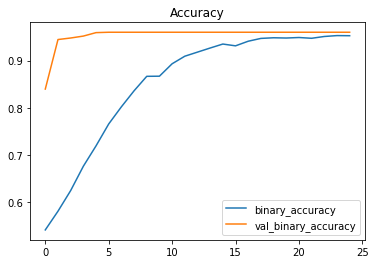

In [8]:
# evaluating accuracy
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

It seems that the model works fairly well, with an accuracy of around 95%.